In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [35]:
# Loading the data
insurance_data = pd.read_csv("insurance.csv", encoding="utf-8")

# Checking column data types
print(insurance_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [36]:
# Checking the data
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [37]:
# Converting non-numerical columns
cols_to_convert = ['sex', 'smoker', 'region']

for col in cols_to_convert:
    insurance_data[col], uniques = pd.factorize(insurance_data[col])
    print(f"Unique values in '{col}': {uniques}")

Unique values in 'sex': Index(['female', 'male'], dtype='object')
Unique values in 'smoker': Index(['yes', 'no'], dtype='object')
Unique values in 'region': Index(['southwest', 'southeast', 'northwest', 'northeast'], dtype='object')


In [38]:
# Checking if the conversion happened correctly
print(insurance_data.info())
insurance_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB
None


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


In [39]:
# Defining the independent (X) and dependent (y) variables
x = np.array(insurance_data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']])
y = np.array(insurance_data[['charges']])

# Printing the percentages for each set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print("{0:0.2f}% in the training set".format((len(x_train)/len(insurance_data.index)) * 100))
print("{0:0.2f}% in the testing set".format((len(x_test)/len(insurance_data.index)) * 100))

79.97% in the training set
20.03% in the testing set


In [40]:
# Initializing the learning algorithm and training
model = LinearRegression()
model.fit(x_train, y_train)

# Predicting
y_pred = model.predict(x_test)

In [41]:
# Calculating metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Printing model evaluation
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R²: {r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Error: 4264.839559524116
Mean Squared Error (MSE): 37175370.24345851
Root Mean Squared Error (RMSE): 6097.160834639227
R²: 0.7436212670404654
Mean Absolute Percentage Error (MAPE): 38.04%


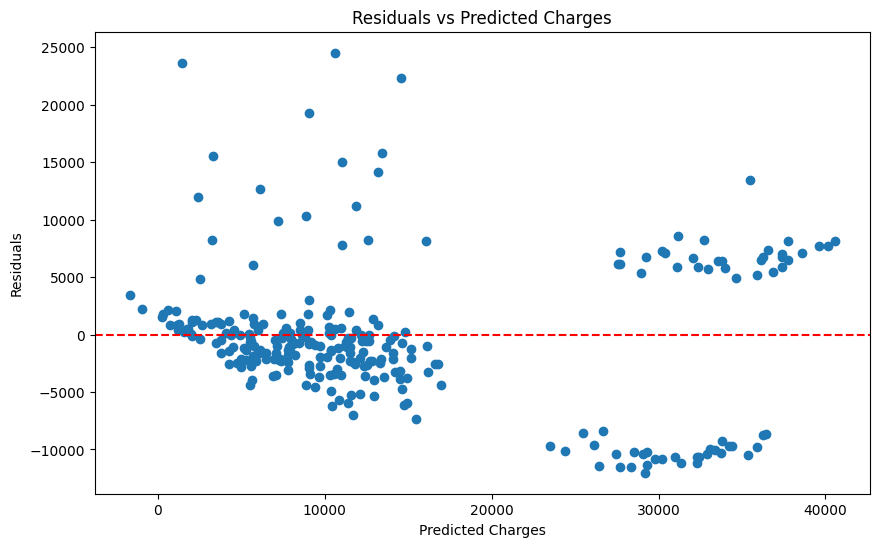

In [42]:
# Residuals vs Predicted Charges
# Residual = Actual Value - Predicted Value
# If the residual is positive, the model has under-predicted the value.
# If the residual is negative, the model has over-predicted the value.
# EXPLANATION: The Residuals vs Predicted Charges Plot helps us understand whether the
  # regression model is making consistent errors or if there are any patterns in the way it is predicting.

residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Charges")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Charges")
plt.show()

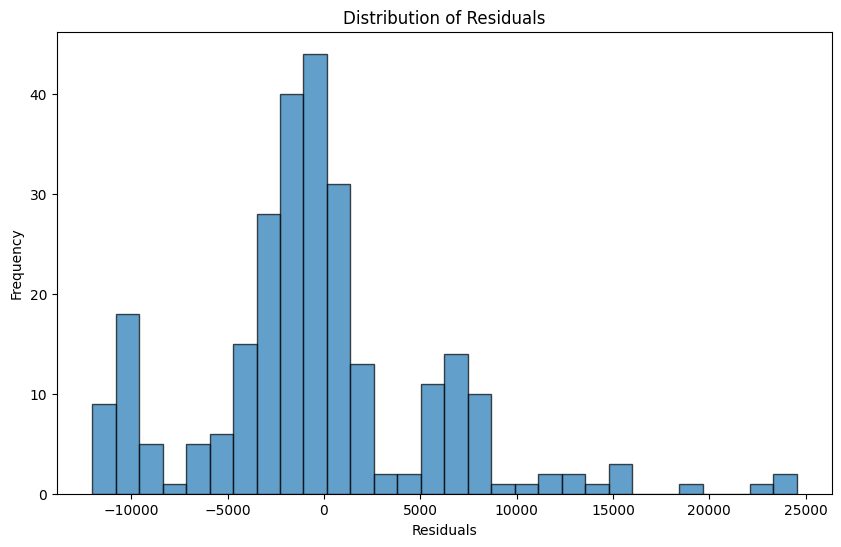

In [43]:
# Histogram of Residuals
# EXPLANATION: This histogram shows the distribution of the residuals. It is used to assess
  # whether the residuals follow a normal distribution.
# Ideally, the residuals should be normally distributed, meaning they follow a bell-shaped curve.

plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

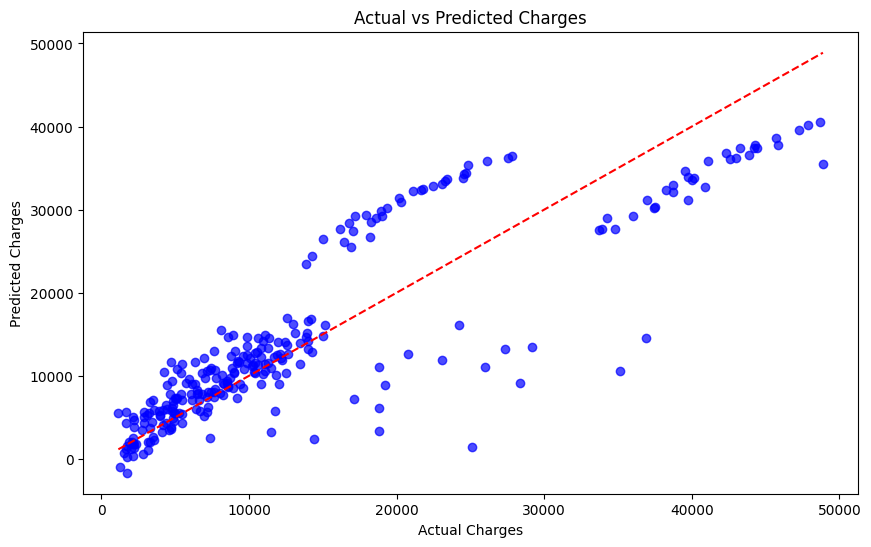

In [44]:
# Actual vs Predicted Charges
# EXPLANATION: shows how close the predictions are to actual values.
# A perfect model would align all points along the red dashed line.

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.show()